In [45]:
import geopandas
import geoplot
import pandas as pd
import geoplot as gplt
import geoplot.crs as gcrs
import geopandas as gpd

In [46]:
import os 
os.getcwd()
os.chdir('C:\\Users\\morga\\Documents\\GitHub\\satellite_imagery\\data\\process')


In [47]:
alep=pd.read_csv('data_label_alep.csv')

In [77]:
alep.head()

,Unnamed: 0,label,geometry,Coordinates
0,0,1,POINT (37.13543285100008 36.23547293500008),POINT (37.13543 36.23547)
1,1,1,POINT (37.13539414500008 36.23556617700007),POINT (37.13539 36.23557)
2,2,1,POINT (37.13908459400005 36.24100053500007),POINT (37.13908 36.24100)
3,3,1,POINT (37.13924325000005 36.24097692800007),POINT (37.13924 36.24098)
4,4,1,POINT (37.13939151100004 36.24095787700008),POINT (37.13939 36.24096)


In [48]:
from shapely import wkt

alep['Coordinates'] = alep['geometry'].apply(wkt.loads)

In [49]:
alep=alep.set_geometry('Coordinates')

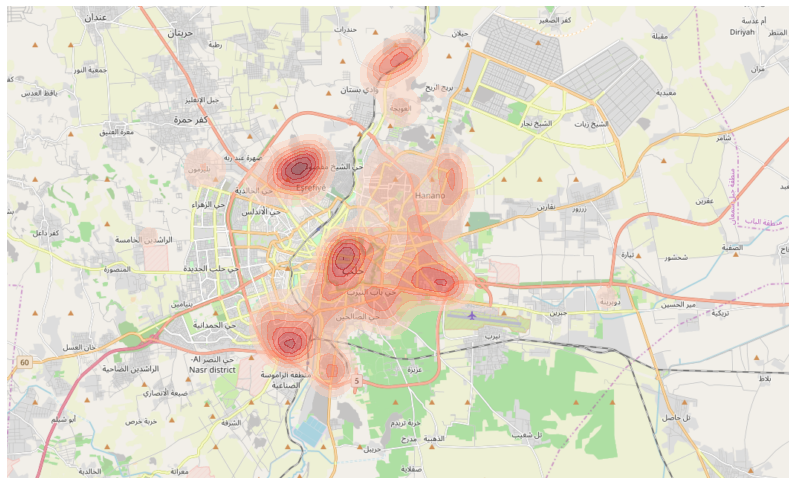

In [67]:
#ax = gplt.polyplot(boroughs, projection=gcrs.AlbersEqualArea())
ax=gplt.webmap(alep, projection=gcrs.WebMercator(),figsize=(14,14))
ax.set_alpha(0)
gplt.kdeplot(alep[alep.label==1], cmap='Reds', shade=True, shade_lowest=False,ax=ax,alpha=0.5)
#gplt.kdeplot(alep[alep.label==0], cmap='Blues', shade=False, shade_lowest=False,ax=ax)

In [98]:
import folium
m = folium.Map([36.1823292727353, 37.17697305914639], zoom_start=12)

In [96]:
m

In [99]:
gplt.kdeplot(alep[alep.label==1], cmap='Reds', shade=True, shade_lowest=False,ax=m,alpha=0.5)

AttributeError: 'Map' object has no attribute 'get_figure'

In [100]:

import contextily as ctx
ctx.add_basemap(ax, url=ctx.providers.Stamen.TonerLite)
ax.set_axis_off()

<Figure size 432x288 with 0 Axes>